In [ ]:
!unzip bank.zip

Archive:  bank.zip
replace bank-full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-full.csv           
replace bank-names.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-names.txt          
replace bank.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank.csv                


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

bank-additional-full dataset is an updated version of the bank-full dataset with more recent data and additional columns added. bank.csv and bank-additional.csv are samples of the bank-full and bank-additional-full respectively. For this project, I'll use the bank-additional-full since it has more information than any other dataset provided.  

In [ ]:
df = pd.read_csv('bank.csv', delimiter=';', quotechar='"')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df1 = pd.read_csv('bank-full.csv', delimiter=';', quotechar='"')
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df2 = pd.read_csv('bank-additional-full.csv', delimiter=';', quotechar='"')
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df2.shape

(41188, 21)

In [ ]:
df3 = pd.read_csv('bank-additional.csv', delimiter=';', quotechar='"')
df3

In [ ]:
#start by cleaning the dataset
df2.isna().sum()#check for null values

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df2.duplicated().sum()#check for duplicate values

12

In [ ]:
df2.drop_duplicates(inplace=True) #drop the duplicated values


In [ ]:
df2.duplicated().sum() #to ensure that the duplicates were dropped

0

In [ ]:
print(df2.dtypes)  # Check column data types


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [ ]:
print(df2.describe())  # Summary statistics


               age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860    

In [ ]:
print(df2.select_dtypes(include=["object"]).columns)


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [ ]:
for col in df2.columns:
    print(f"Unique values in '{col}':")
    print(df2[col].unique())  # Show unique values
    print("-" * 40)  # Separator for readability


Unique values in 'age':
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
----------------------------------------
Unique values in 'job':
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
----------------------------------------
Unique values in 'marital':
['married' 'single' 'divorced' 'unknown']
----------------------------------------
Unique values in 'education':
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
----------------------------------------
Unique values in 'default':
['no' 'unknown' 'yes']
----------------------------------------
Unique values in 'housing':
['no' 'yes' 'unknown']
----------------------------------------


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

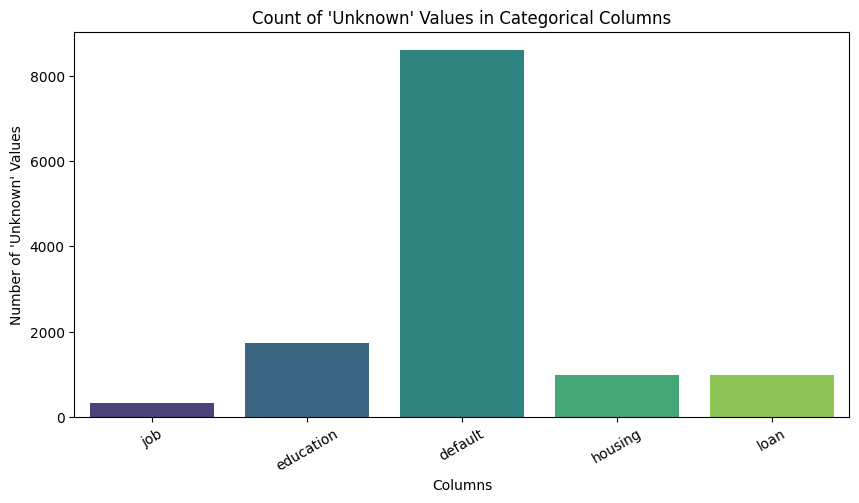

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns with "unknown" values
unknown_cols = ['job', 'education', 'default', 'housing', 'loan']

# Count "unknown" values in each column
unknown_counts = {col: (df2[col] == "unknown").sum() for col in unknown_cols}

# Convert to DataFrame for visualization
unknown_df = pd.DataFrame(list(unknown_counts.items()), columns=['Column', 'Unknown Count'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Column", hue="Column", y="Unknown Count", data=unknown_df, palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Count of 'Unknown' Values in Categorical Columns")
plt.ylabel("Number of 'Unknown' Values")
plt.xlabel("Columns")
plt.xticks(rotation=30)
plt.show()


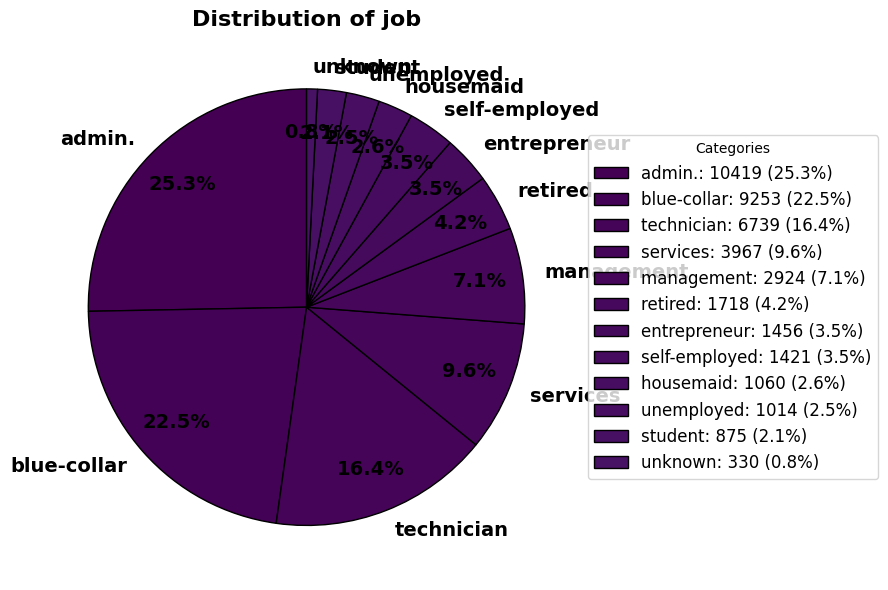

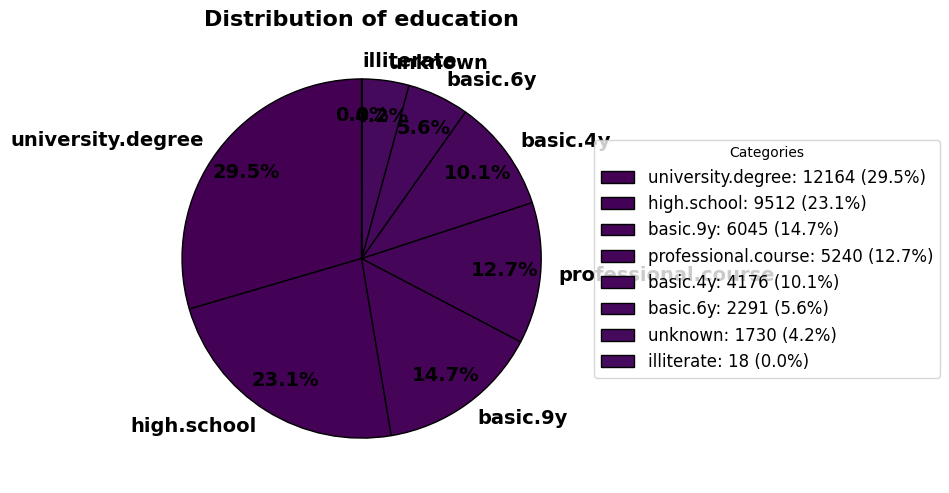

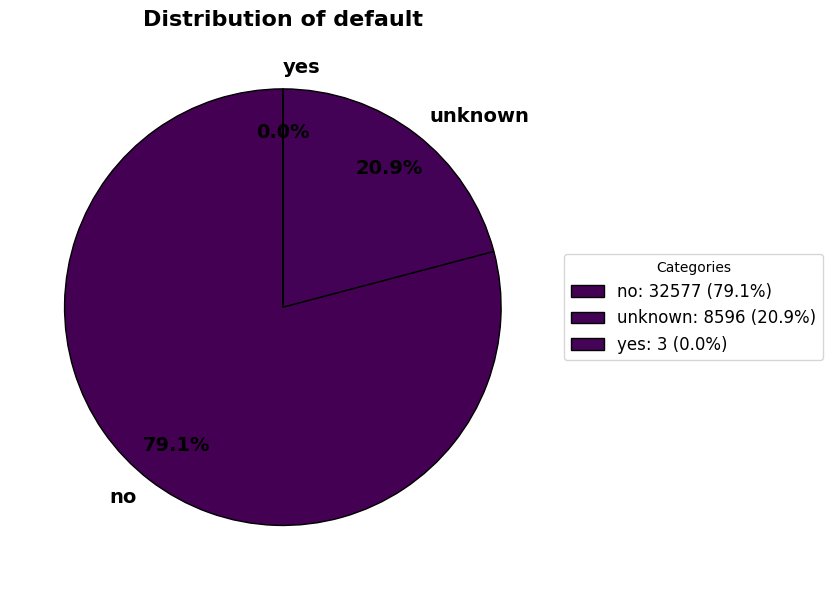

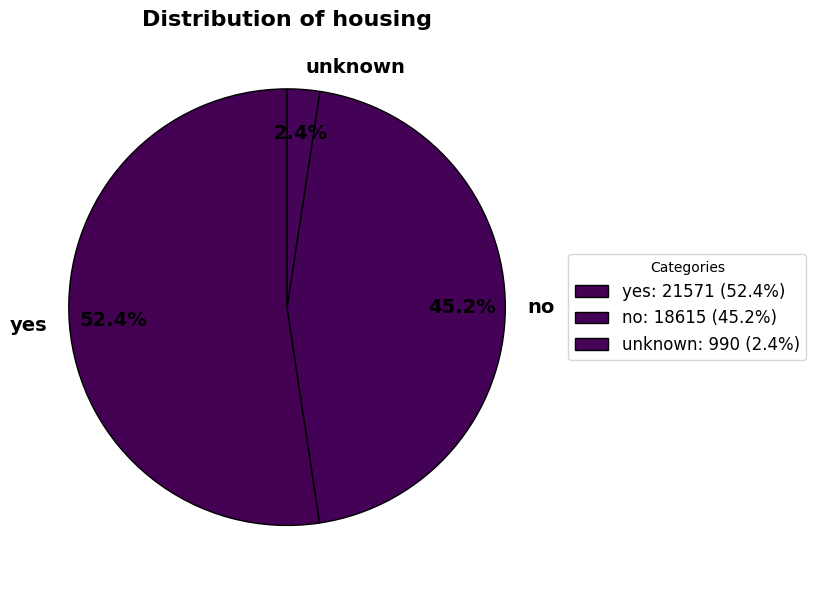

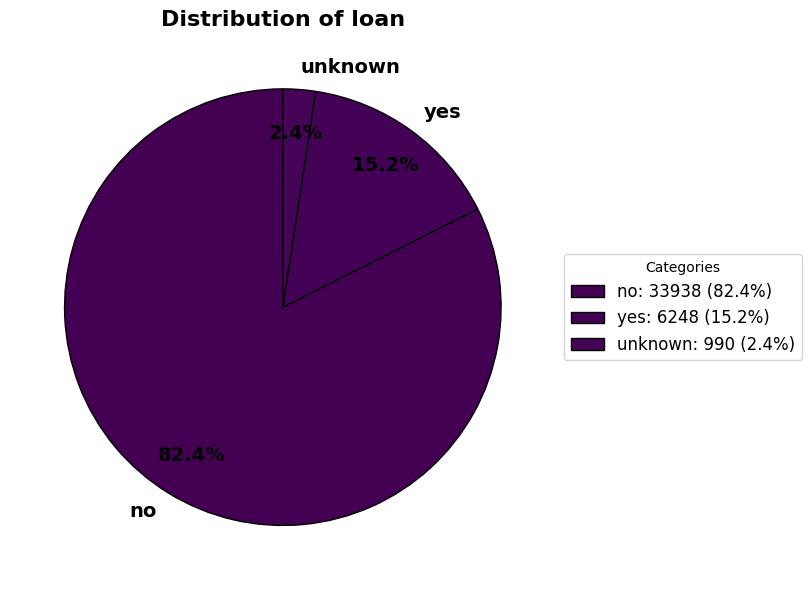

In [ ]:
for col in unknown_cols:
    plt.figure(figsize=(8, 6))  # Slightly taller for better spacing

    # Get value counts
    counts = df2[col].value_counts()
    labels = counts.index
    sizes = counts.values
    colors = plt.cm.viridis(range(len(labels)))  # Use a colormap

    # Create pie chart
    wedges, texts, autotexts = plt.pie(
        sizes, labels=labels,
        startangle=90, colors=colors,
        wedgeprops={"edgecolor": "black"},
        textprops={"fontsize": 14, "weight": "bold"},
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',  # Hide 0% labels
        pctdistance=0.8  # Keeps numbers near the slices (optional)
    )

    # Move percentage labels to a legend
    plt.legend(
        loc="center left", bbox_to_anchor=(1, 0.5),
        title="Categories", fontsize=12,
        labels=[f"{label}: {size} ({size / sum(sizes) * 100:.1f}%)" for label, size in zip(labels, sizes)]
    )

    # Title and layout
    plt.title(f"Distribution of {col}", fontsize=16, weight="bold")
    plt.tight_layout()
    plt.show()


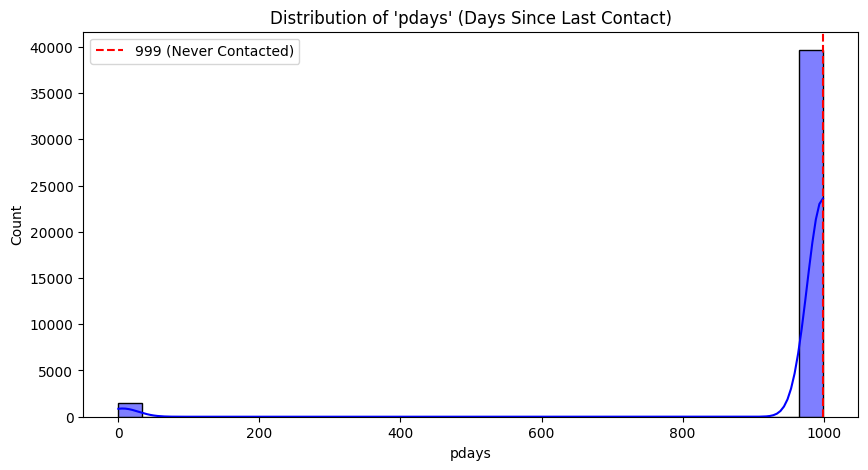

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['pdays'], bins=30, kde=True, color="blue")
plt.axvline(x=999, color='red', linestyle='dashed', label="999 (Never Contacted)")
plt.title("Distribution of 'pdays' (Days Since Last Contact)")
plt.xlabel("pdays")
plt.ylabel("Count")
plt.legend()
plt.show()


In [ ]:
df2["pdays"].value_counts()

,count
pdays,
999,39661
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


In [ ]:
df2["default"].value_counts()

,count
default,
no,32577
unknown,8596
yes,3


In [ ]:
df2["marital"].value_counts()

,count
marital,
married,24921
single,11564
divorced,4611
unknown,80


In [ ]:
df2["job"].value_counts()

,count
job,
admin.,10419
blue-collar,9253
technician,6739
services,3967
management,2924
retired,1718
entrepreneur,1456
self-employed,1421
housemaid,1060


In [ ]:
df2["housing"].value_counts()

,count
housing,
yes,21571
no,18615
unknown,990


In [ ]:
df2["loan"].value_counts()

,count
loan,
no,33938
yes,6248
unknown,990


In [ ]:
df2["education"].value_counts()

,count
education,
university.degree,12164
high.school,9512
basic.9y,6045
professional.course,5240
basic.4y,4176
basic.6y,2291
unknown,1730
illiterate,18


In [ ]:
# Replace 'unknown' with mode in categorical columns where unknowns are few
for col in ['education', 'housing', 'loan', 'marital', 'job']:
    mode_value = df2[col].mode()[0]  # Get most common value
    df2[col] = df2[col].replace("unknown", mode_value)

# Treat 'unknown' as a separate category in default since it has many unknowns)
df2['default'] = df2['default'].replace("unknown", "Unknown_Status")


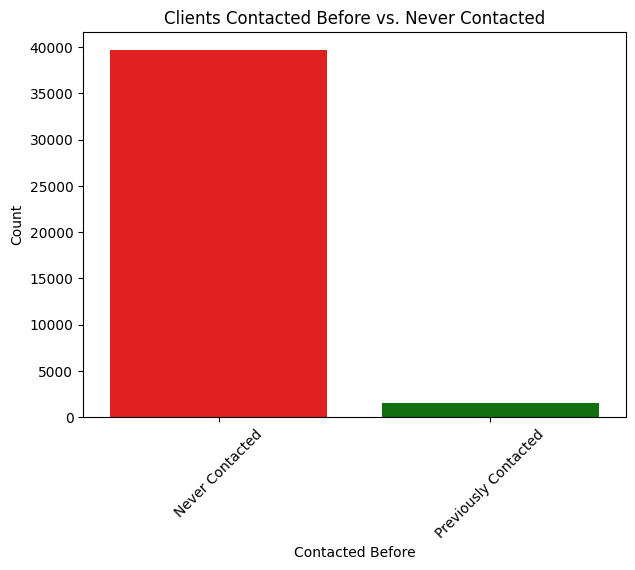

In [ ]:
# Create a binary column for contacted_before
df2['contacted_before'] = df2['pdays'].apply(lambda x: "Never Contacted" if x == 999 else "Previously Contacted")

# Plot
plt.figure(figsize=(7, 5))
sns.countplot(x="contacted_before", hue="contacted_before", data=df2, palette=["red", "green"], legend=False)
plt.xticks(rotation=45)
plt.title("Clients Contacted Before vs. Never Contacted")
plt.ylabel("Count")
plt.xlabel("Contacted Before")
plt.show()


In [ ]:
Numerical_variables = ['age', 'emp.var.rate', 'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed', 'duration', 'campaign', 'pdays', 'previous']
Categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
target_variable = 'y'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_categorical_relationships(df2, target_variable, Categorical_variables):
    """
    Plots count plots for Categorical_variables against the Target_variable.

    Parameters:
    - df2: Pandas DataFrame containing the data
    - target_variable: Name of the target column
    - Categorical_variables: List of categorical feature names
    """
    for feature in Categorical_variables:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=feature, hue=target_variable, data=df2)
        plt.xticks(rotation=45)
        plt.title(f"Distribution of {target_variable} by {feature}")
        plt.show()


In [ ]:
def visualize_numerical_relationships(df2, target_variable, Numerical_variables):
    """
    Plots boxplots for Numerical_variables against the Target_variable.

    Parameters:
    - df2: Pandas DataFrame containing the data
    - Target_variable: Name of the target column
    - Numerical_variables: List of numerical feature names
    """
    for feature in Numerical_variables:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=target_variable, y=feature, data=df2)
        plt.title(f"Boxplot of {feature} by {target_variable}")
        plt.show()

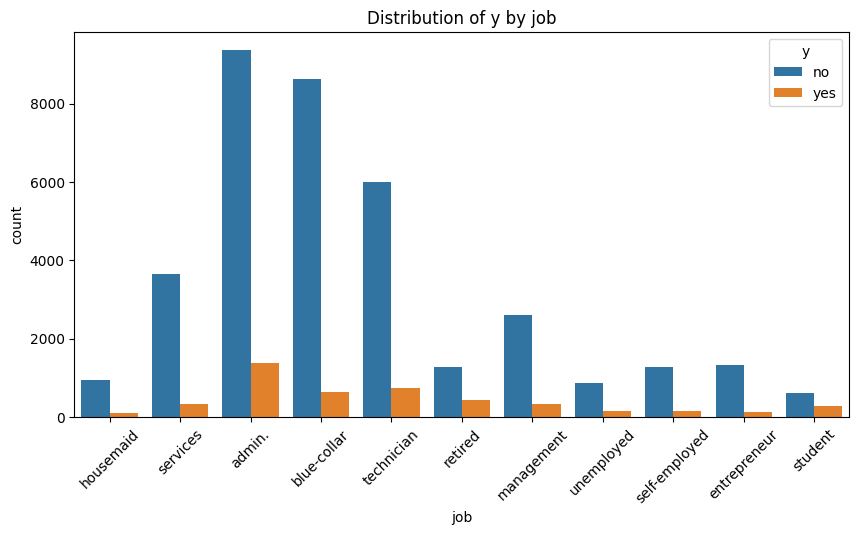

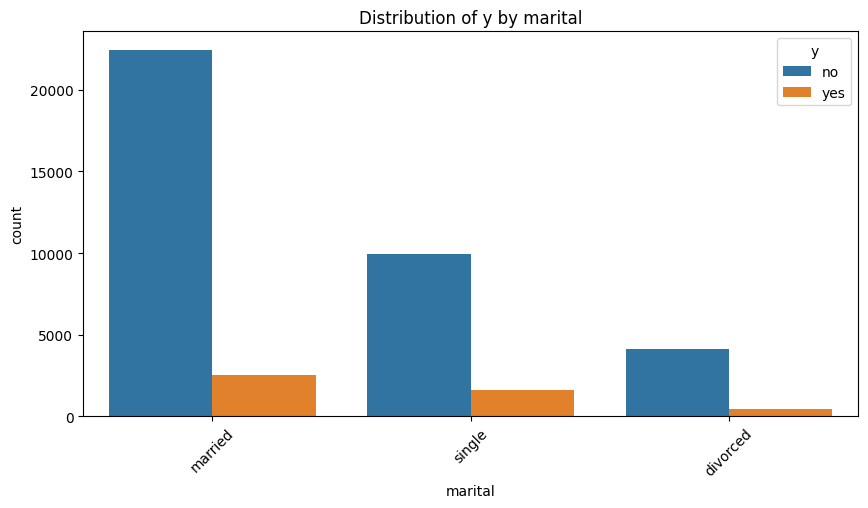

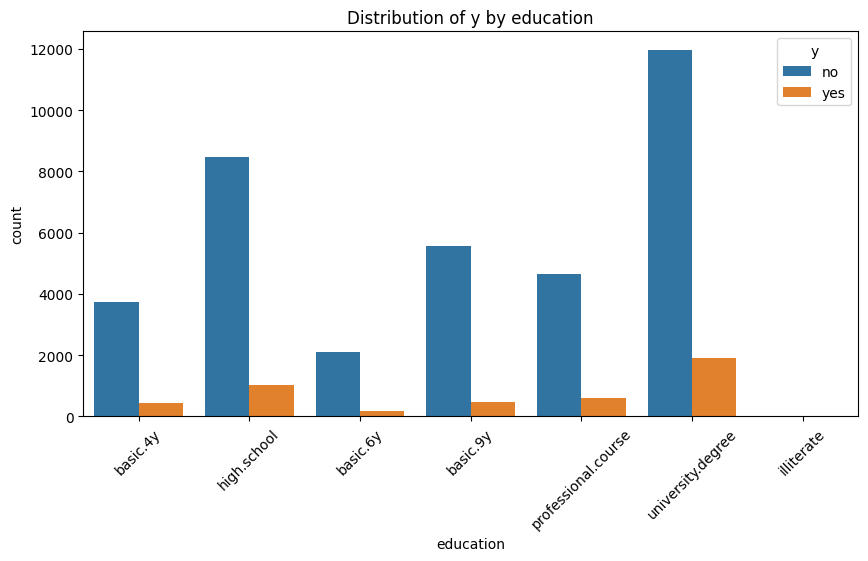

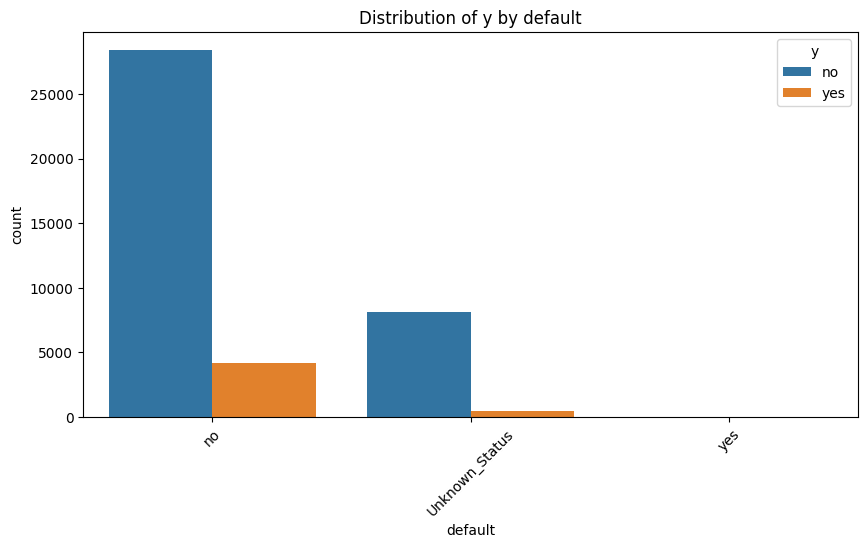

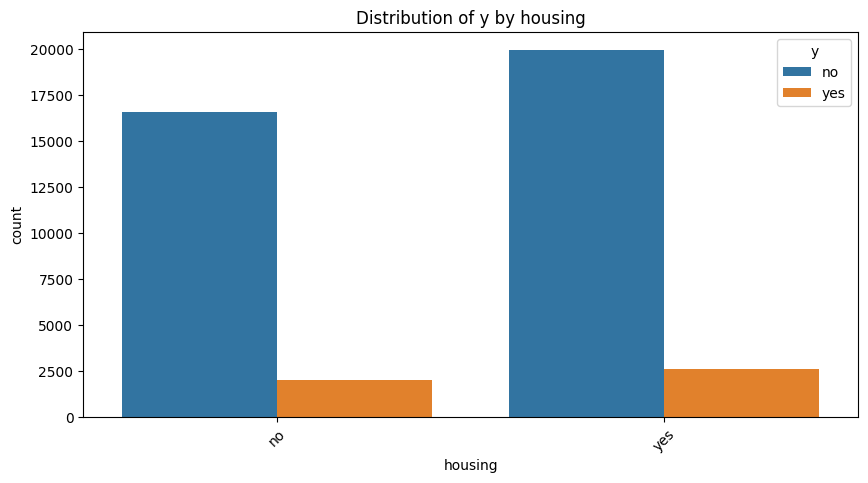

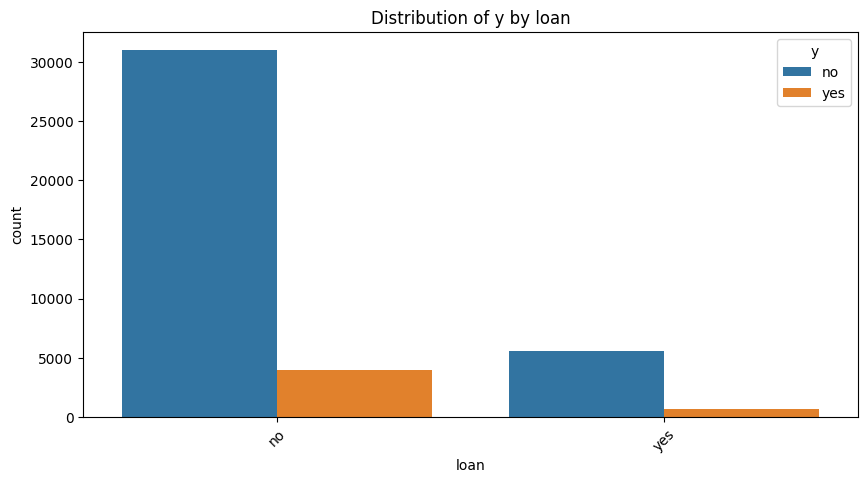

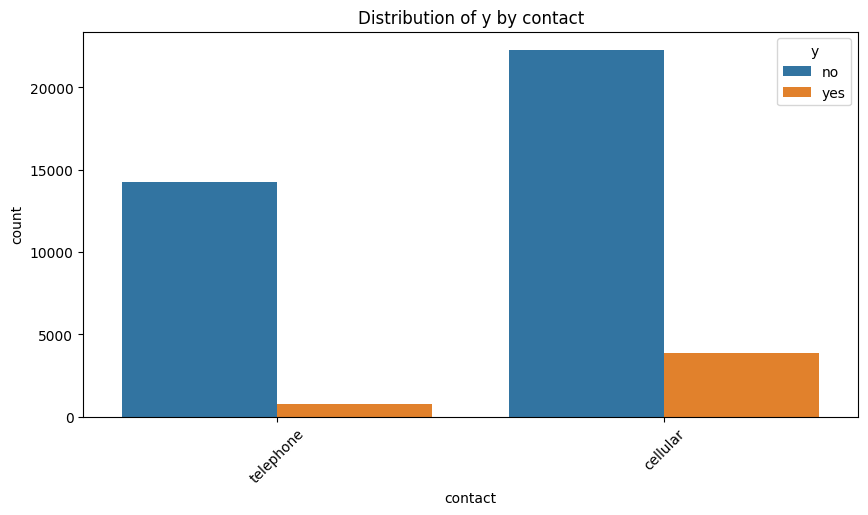

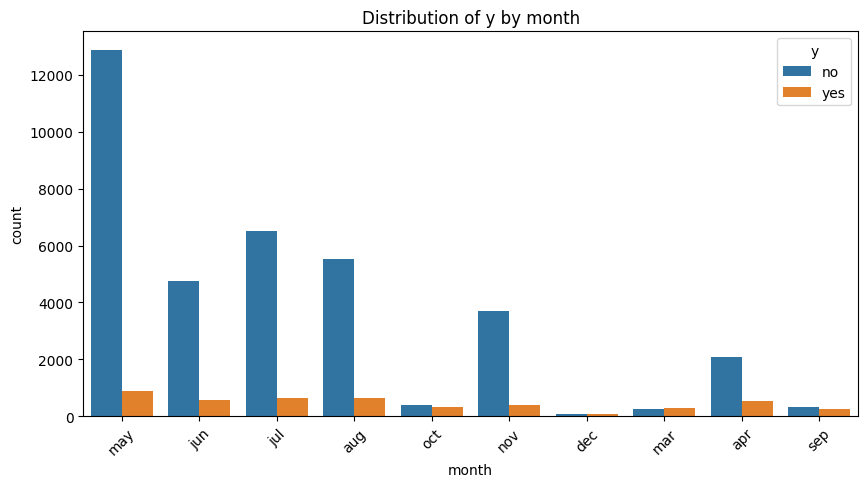

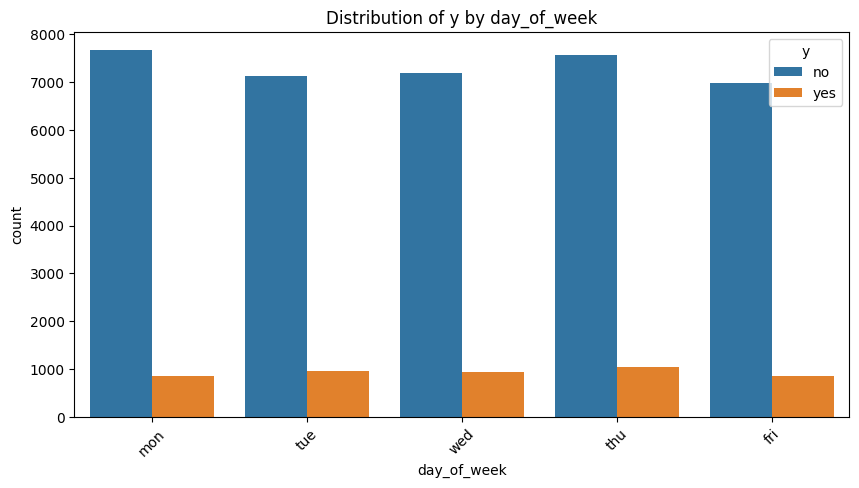

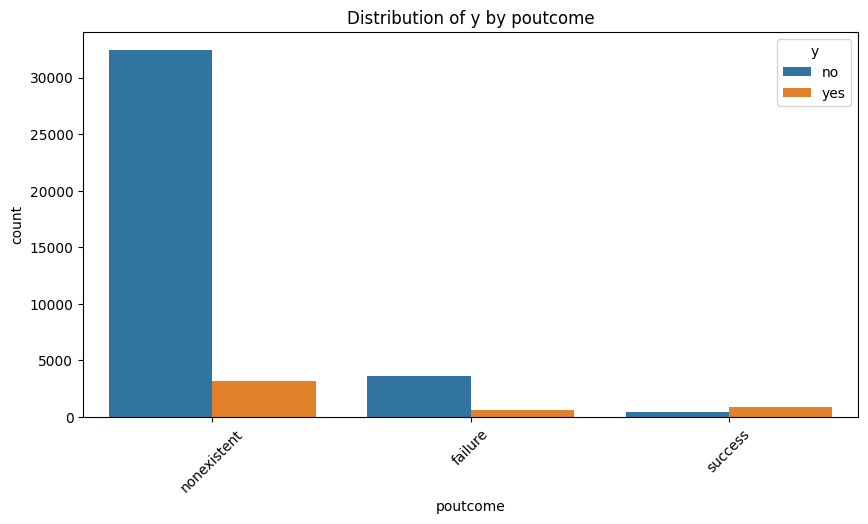

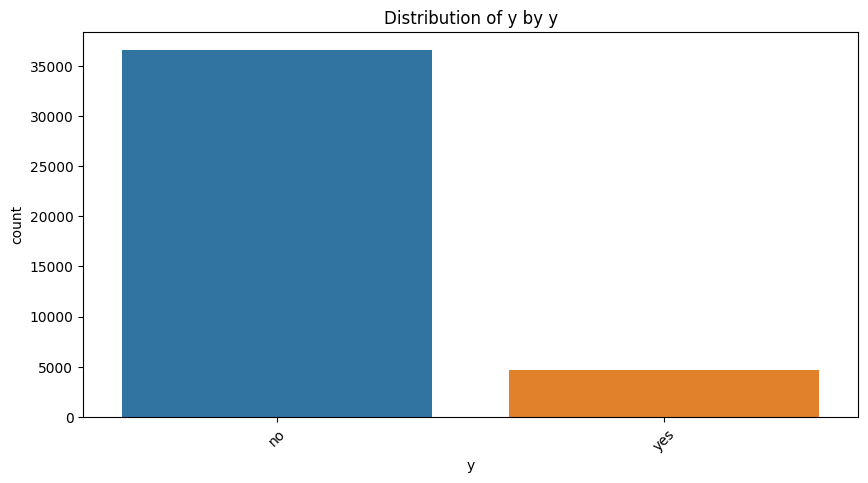

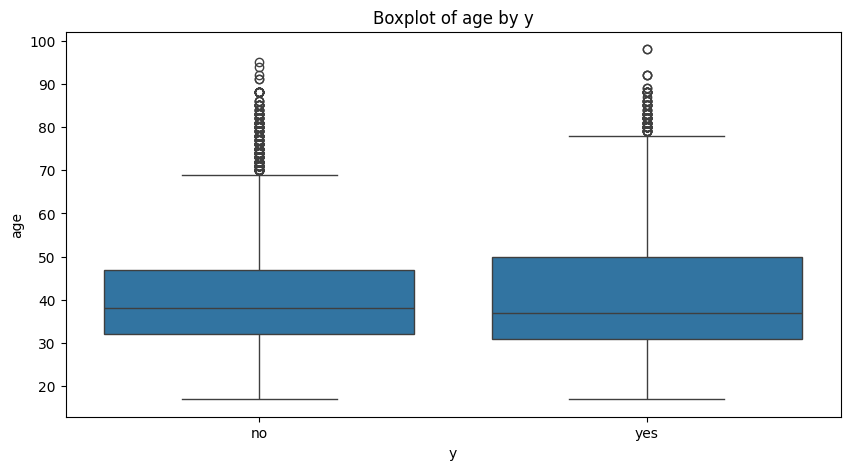

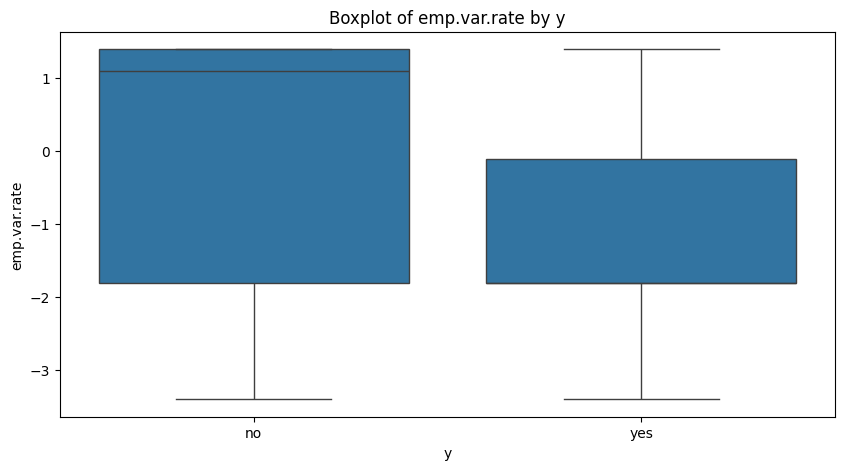

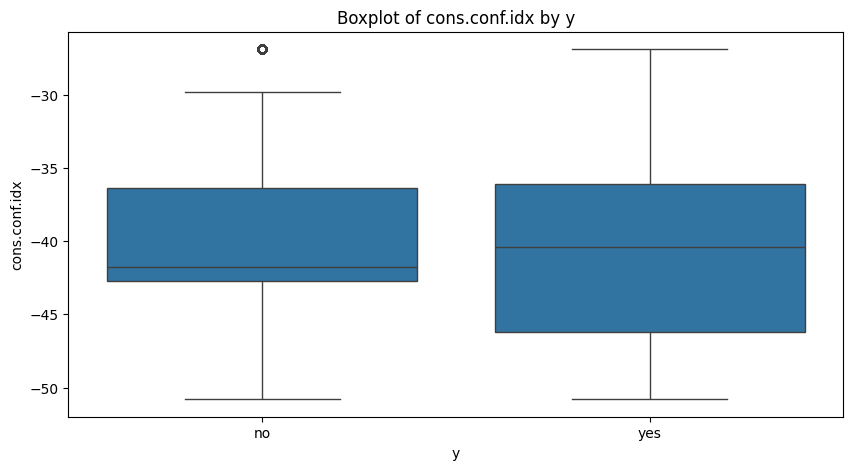

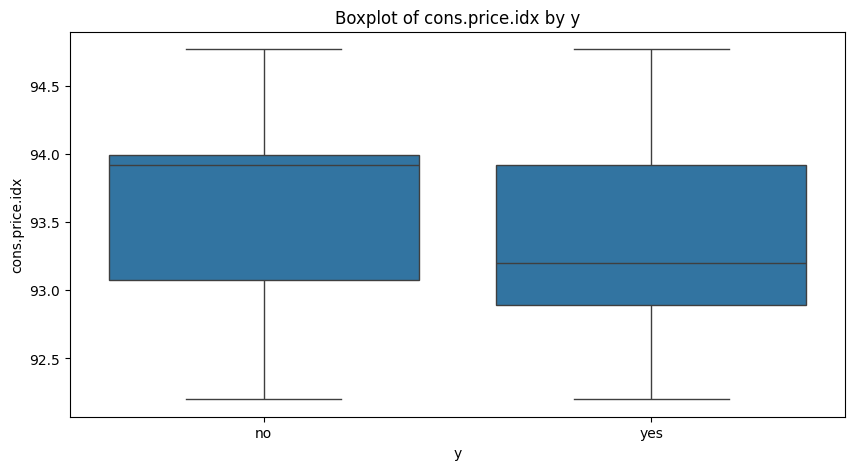

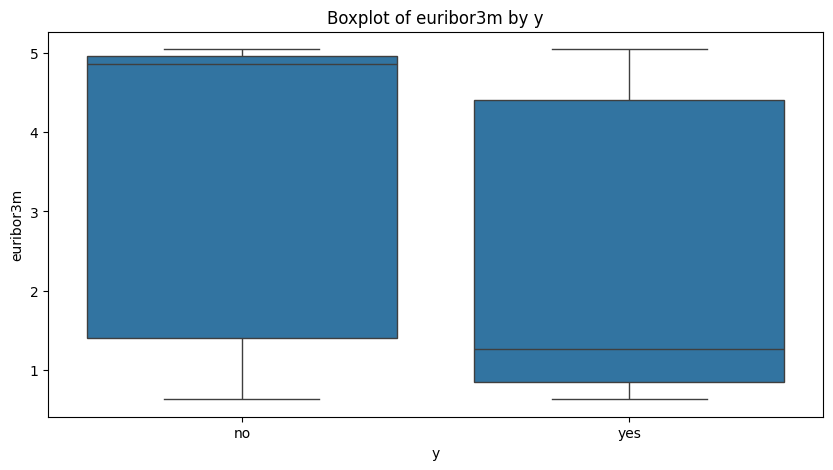

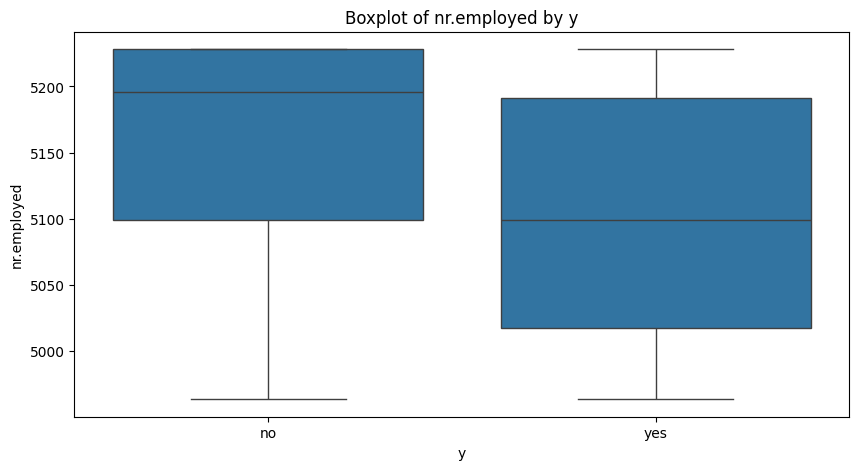

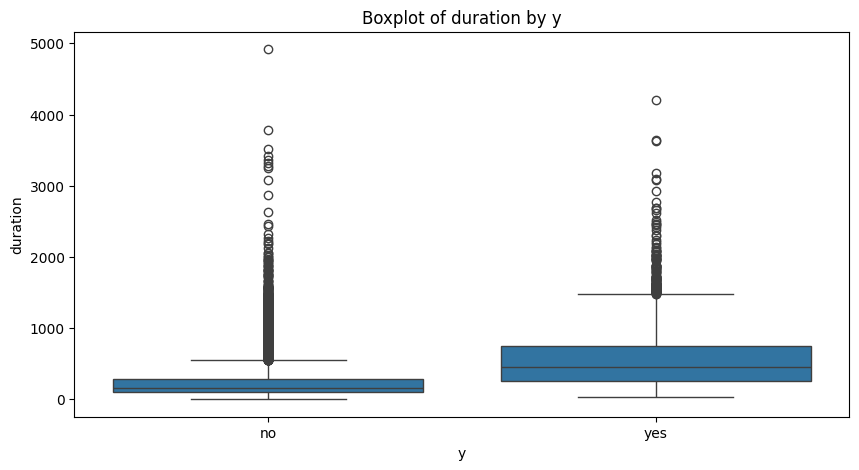

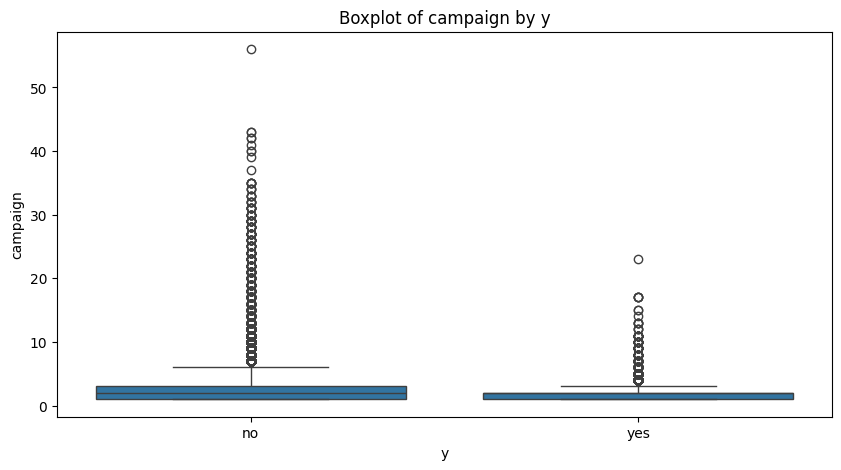

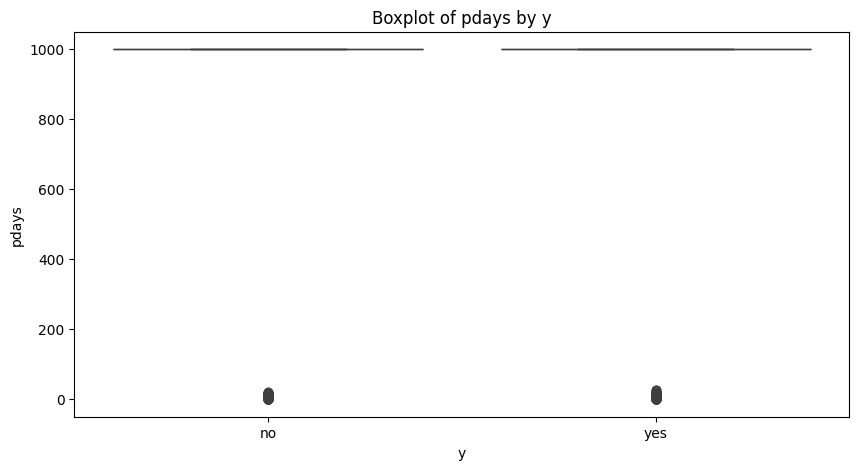

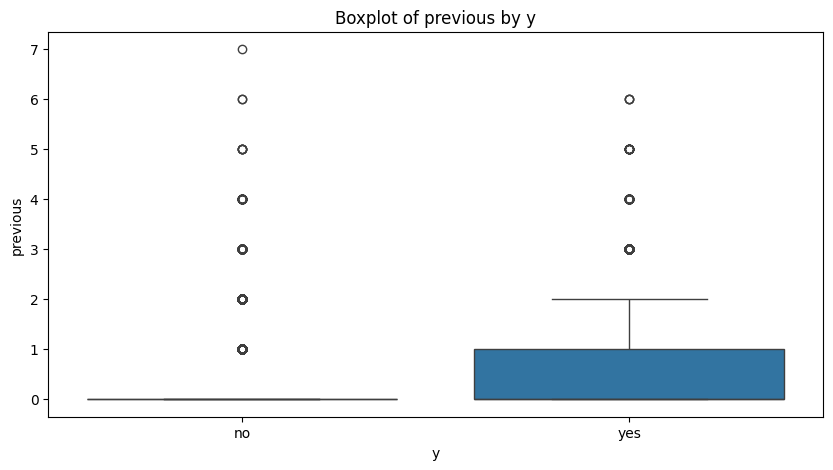

In [ ]:
visualize_categorical_relationships(df2, 'y', Categorical_variables)
visualize_numerical_relationships(df2, 'y', Numerical_variables)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # 'drop=first' avoids dummy variable trap

# Fit and transform
encoded_data = encoder.fit_transform(df2[["month", "job", "marital", "education", "poutcome", "default", "day_of_week"]])

# Convert to DataFrame with correct column names
encoded_df2 = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["month", "job", "marital", "education", "poutcome", "default", "day_of_week"]))
df2 = df2.reset_index(drop=True)  # Ensure indices match

# Concatenate with original DataFrame (dropping original categorical columns)
df2_final = pd.concat([df2, encoded_df2], axis=1)

df2_final;

In [ ]:
df2_final.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'default_Unknown_Status',
       'def

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2_final["housing"] = le.fit_transform(df2_final["housing"])
df2_final["loan"] = le.fit_transform(df2_final["loan"])
df2_final["contact"] = le.fit_transform(df2_final["contact"])
df2_final["y"] = le.fit_transform(df2_final["y"])
print(df2_final)


       age          job  marital            education         default  \
0       56    housemaid  married             basic.4y              no   
1       57     services  married          high.school  Unknown_Status   
2       37     services  married          high.school              no   
3       40       admin.  married             basic.6y              no   
4       56     services  married          high.school              no   
...    ...          ...      ...                  ...             ...   
41171   73      retired  married  professional.course              no   
41172   46  blue-collar  married  professional.course              no   
41173   56      retired  married    university.degree              no   
41174   44   technician  married  professional.course              no   
41175   74      retired  married  professional.course              no   

       housing  loan  contact month day_of_week  ...  poutcome_nonexistent  \
0            0     0        1   may         m

In [ ]:
print(df2_final)

       age          job  marital            education         default  \
0       56    housemaid  married             basic.4y              no   
1       57     services  married          high.school  Unknown_Status   
2       37     services  married          high.school              no   
3       40       admin.  married             basic.6y              no   
4       56     services  married          high.school              no   
...    ...          ...      ...                  ...             ...   
41171   73      retired  married  professional.course              no   
41172   46  blue-collar  married  professional.course              no   
41173   56      retired  married    university.degree              no   
41174   44   technician  married  professional.course              no   
41175   74      retired  married  professional.course              no   

       housing  loan  contact month day_of_week  ...  poutcome_nonexistent  \
0            0     0        1   may         m

In [ ]:
df2_final.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
...,...
day_of_week_fri,0
day_of_week_mon,0
day_of_week_thu,0
day_of_week_tue,0


In [ ]:
df2_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   job                            41176 non-null  object 
 2   marital                        41176 non-null  object 
 3   education                      41176 non-null  object 
 4   default                        41176 non-null  object 
 5   housing                        41176 non-null  int64  
 6   loan                           41176 non-null  int64  
 7   contact                        41176 non-null  int64  
 8   month                          41176 non-null  object 
 9   day_of_week                    41176 non-null  object 
 10  duration                       41176 non-null  int64  
 11  campaign                       41176 non-null  int64  
 12  pdays                          41176 non-null 

In [ ]:
df2_final["pdays"].value_counts()

,count
pdays,
999,39661
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


In [ ]:
df2_final["pdays"] = df2_final["pdays"].apply(lambda x: -1 if x == 999 else x)


In [ ]:
df2_final["pdays"].value_counts()

,count
pdays,
-1,39661
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


In [ ]:
df2_final["y"].value_counts()

,count
y,
0,36537
1,4639


In [ ]:
# Define features and target variable
X = df2_final.drop(columns=['y', 'job', 'education', 'default', 'marital', 'month', 'day_of_week', 'poutcome'])  # Features
y = df2_final['y']  # Target

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

32940
8236


In [ ]:
print(len(y_train))
print(len(y_test))

32940
8236


In [ ]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.8848
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7265
           1       0.51      0.51      0.51       971

    accuracy                           0.88      8236
   macro avg       0.72      0.72      0.72      8236
weighted avg       0.88      0.88      0.88      8236



In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier

# Apply SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Train a Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred1 = model.predict(X_test)


Accuracy: 0.8819
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7265
           1       0.50      0.51      0.50       971

    accuracy                           0.88      8236
   macro avg       0.72      0.72      0.72      8236
weighted avg       0.88      0.88      0.88      8236



In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred1)
report = classification_report(y_test, y_pred1)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

In [ ]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred1))

ROC-AUC Score: 0.7211328810805869


ROC-AUC Score: 0.7211328810805869
Confusion Matrix:
 [[6767  498]
 [ 475  496]]


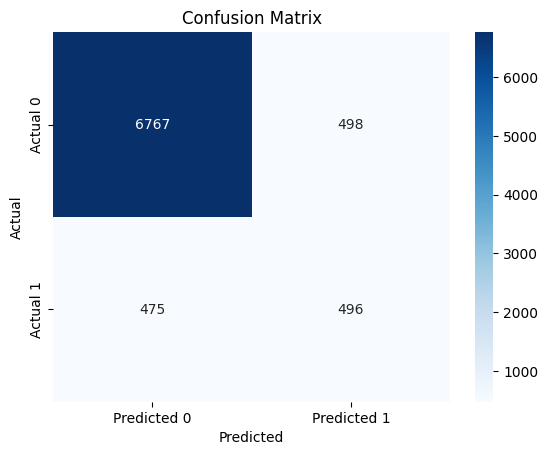

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

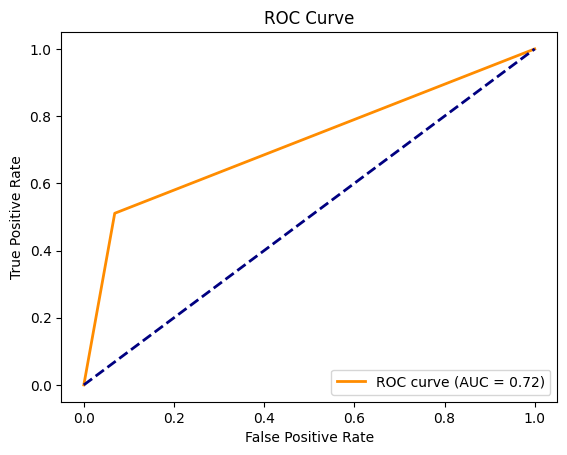

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7265
           1       0.50      0.51      0.50       971

    accuracy                           0.88      8236
   macro avg       0.72      0.72      0.72      8236
weighted avg       0.88      0.88      0.88      8236



In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred1))

In [ ]:
# Limit tree depth and minimum samples per leaf
model1 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

In [ ]:
# Make predictions
y_pred2 = model1.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
report = classification_report(y_test, y_pred2)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Accuracy: 0.9100
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7265
           1       0.64      0.54      0.58       971

    accuracy                           0.91      8236
   macro avg       0.79      0.75      0.77      8236
weighted avg       0.90      0.91      0.91      8236

